In [2]:
import pyreadr

# Replace 'your_file.rds' with your actual file path
result = pyreadr.read_r("C:/Users/jr24440/Downloads/allSets_SMaPP_rawRTs.rds")

# For .rds files, the loaded object is stored with a key of None
data = result[None]
print(data.head())

           twid         rtwid rt.user.verified  rt.followers  rt.user.id_str  \
0  6.612629e+17  6.611444e+17            False         11696    1.557932e+09   
1  6.612629e+17  6.612537e+17            False            69    2.593436e+09   
2  6.612629e+17  6.594803e+17            False           419    2.787791e+09   
3  6.612629e+17  6.612477e+17            False          3189    4.970305e+08   
4  6.612629e+17  6.611698e+17            False           878    3.233484e+09   

                                                text  rt.count  \
0  When you about to ask her dad for her hand in ...      1024   
1  When your friend asks @aleem_official for a "h...         3   
2  It's #weddinghour, so top up your glass and en...         2   
3  Think of a card? When you book me I will tell ...        14   
4  @Gurmeetramrahim #7thWeekMSG2\nMarriage of Shu...        17   

               src                      rt.created timestamp  user.verified  \
0    ProteinShaykh  Mon Nov 02 11:34:35 +00

In [3]:
import pandas as pd

# 1. Size of the dataset (number of observations)
num_obs = data.shape[0]
print("Number of observations:", num_obs)

# 2. Number of verified users (using the 'user.verified' column)
# (If you wish to also check 'rt.user.verified', you can do that similarly.)
num_verified = data['user.verified'].sum()  # Since this column is boolean, True counts as 1
print("Number of verified users:", num_verified)

# 3. Average number of followers (using the 'rt.followers' column)
avg_followers = data['rt.followers'].mean()
print("Average number of followers (rt.followers):", avg_followers)

# 4. Average number of retweets per tweet (using the 'rt.count' column)
avg_retweets = data['rt.count'].mean()
print("Average number of retweets per tweet:", avg_retweets)

# --- Additional Descriptive Statistics ---

# Basic statistics for 'rt.followers' and 'rt.count'
print("\nDescriptive statistics for 'rt.followers' and 'rt.count':")
print(data[['rt.followers', 'rt.count']].describe())

# Count unique values for some categorical columns (e.g., language and topic)
unique_lang = data['lang'].nunique()
unique_topics = data['topic'].nunique()
print("\nNumber of unique languages:", unique_lang)
print("Number of unique topics:", unique_topics)

# If desired, we can also explore the length of the tweet texts
data['text_length'] = data['text'].apply(len)
print("\nDescriptive statistics for tweet text lengths:")
print(data['text_length'].describe())

Number of observations: 8173240
Number of verified users: 1.3187903171416108e+16
Average number of followers (rt.followers): 1002474.9173160215
Average number of retweets per tweet: 1029.6219742721369

Descriptive statistics for 'rt.followers' and 'rt.count':
       rt.followers      rt.count
count  8.173240e+06  8.173240e+06
mean   1.002475e+06  1.029622e+03
std    5.171946e+06  4.794164e+03
min    0.000000e+00  1.000000e+00
25%    2.967000e+03  4.000000e+00
50%    2.519400e+04  3.000000e+01
75%    1.480810e+05  3.270000e+02
max    8.012335e+07  4.502620e+05

Number of unique languages: 0
Number of unique topics: 3

Descriptive statistics for tweet text lengths:
count    8.173240e+06
mean     1.093206e+02
std      3.037197e+01
min      4.000000e+00
25%      8.800000e+01
50%      1.190000e+02
75%      1.360000e+02
max      2.280000e+02
Name: text_length, dtype: float64


In [4]:
print(data.dtypes)

twid                float64
rtwid               float64
rt.user.verified     object
rt.followers          int32
rt.user.id_str      float64
text                 object
rt.count              int32
src                  object
rt.created           object
timestamp            object
user.verified       float64
user.id_str          object
user.screen_name     object
lang                 object
topic                object
text_length           int64
dtype: object


In [5]:
data['rt.user.verified'] = data['rt.user.verified'].astype(bool)

In [6]:
print(data.dtypes)

twid                float64
rtwid               float64
rt.user.verified       bool
rt.followers          int32
rt.user.id_str      float64
text                 object
rt.count              int32
src                  object
rt.created           object
timestamp            object
user.verified       float64
user.id_str          object
user.screen_name     object
lang                 object
topic                object
text_length           int64
dtype: object


In [7]:
num_verified = data['rt.user.verified'].sum()
print("Number of verified users:", num_verified)

Number of verified users: 8173240


In [8]:
print(data['rt.user.verified'].dtype)

bool


In [9]:
data['rt.user.verified'] = data['rt.user.verified'].apply(lambda x: True if str(x).lower() == 'true' else False)
num_verified = data['rt.user.verified'].sum()
print("Number of verified users:", num_verified)

Number of verified users: 8173240


In [10]:
# Check the current values and type
print("Unique values before conversion:", data['rt.user.verified'].unique())
print("Data type before conversion:", data['rt.user.verified'].dtype)

# Convert the column to boolean (choose one method)
data['rt.user.verified'] = data['rt.user.verified'].astype(str).str.lower().map({'true': True, 'false': False})

# Verify conversion
print("Unique values after conversion:", data['rt.user.verified'].unique())
print("Data type after conversion:", data['rt.user.verified'].dtype)

# Count the verified users
num_verified = data['rt.user.verified'].sum()
print("Number of verified users:", num_verified)

Unique values before conversion: [ True]
Data type before conversion: bool
Unique values after conversion: [ True]
Data type after conversion: bool
Number of verified users: 8173240


In [11]:
if (data['rt.user.verified'] == 'True').any():
    print("At least one value is the string 'True'")
else:
    print("No values are exactly the string 'True'")

No values are exactly the string 'True'


In [12]:
# First, inspect the unique values to confirm the encoding
print("Unique values in user.verified:", data['user.verified'].unique())

# Count rows where user.verified equals 1.0 (indicating a verified user)
num_verified = (data['user.verified'] == 1.0).sum()
print("Number of verified users:", num_verified)

Unique values in user.verified: [8.13692360e+07 3.40034435e+09 3.81449316e+08 ... 2.40982230e+07
 1.53167836e+08 1.21736561e+09]
Number of verified users: 0


In [13]:
data['user.verified'].head(25)

0     8.136924e+07
1     3.400344e+09
2     3.814493e+08
3     2.967724e+09
4     2.472040e+09
5     3.455539e+08
6     4.651578e+08
7     3.974865e+07
8     2.544377e+09
9     2.222849e+08
10    2.824623e+09
11    4.899297e+08
12    1.167302e+09
13    2.457100e+09
14    2.624899e+08
15    3.008386e+09
16    5.647353e+08
17    8.183069e+07
18    5.562617e+08
19    6.059034e+08
20    2.458409e+09
21    2.231570e+09
22    9.936530e+07
23    6.006797e+08
24    3.020938e+09
Name: user.verified, dtype: float64

C:\Users\jr24440\AppData\Local\Temp\ipykernel_13360\3360908073.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['rt.created'] = pd.to_datetime(data['rt.created'], errors='coerce')


           date  tweet_count  total_retweets
0    2008-05-01            1               1
1    2009-01-06            1               3
2    2009-02-16            1               3
3    2009-05-27            1               1
4    2009-06-22            1               2
..          ...          ...             ...
876  2016-01-10         6269          563946
877  2016-01-11         6736          161781
878  2016-01-12         7453          157707
879  2016-01-13        36938        16230877
880  2016-01-14         1440           26990

[881 rows x 3 columns]


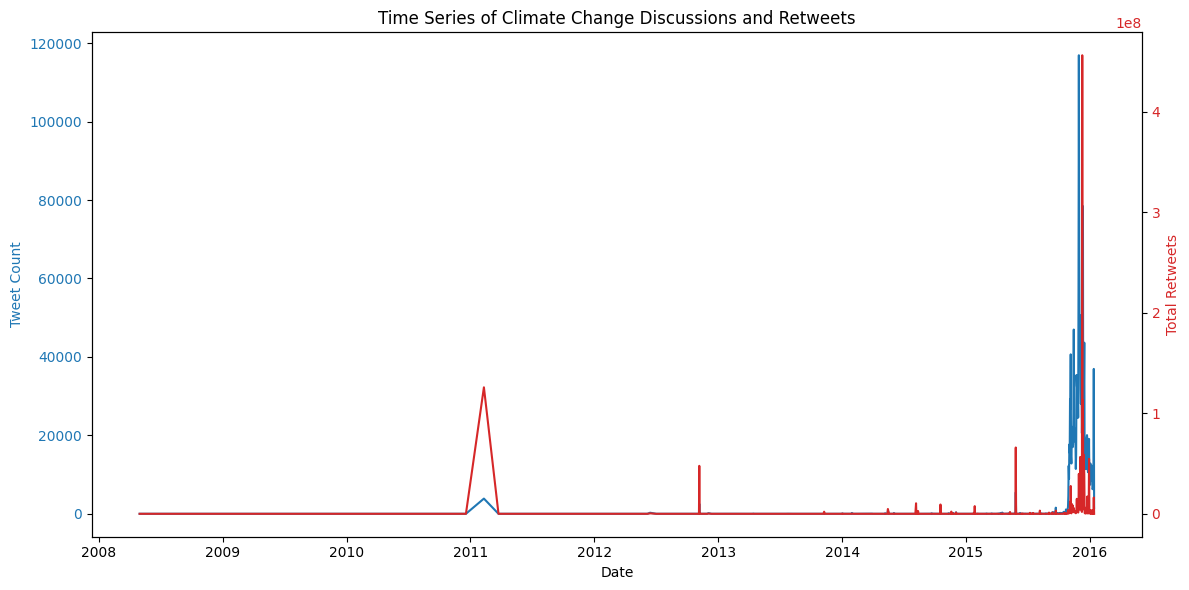

In [14]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'rt.created' to datetime (adjust format if needed)
data['rt.created'] = pd.to_datetime(data['rt.created'], errors='coerce')
data = data.dropna(subset=['rt.created'])

# Define a list of keywords related to climate discussions
keywords = [
    "climate change", "global warming", "climate crisis", "climate emergency",
    "greenhouse gas", "carbon emissions", "renewable energy", "sustainability",
    "fossil fuel", "environmental policy"
]

# Create a regex pattern that searches for any of these keywords (case insensitive)
pattern = '|'.join(keywords)

# Create a new column 'climate_related' that is True if the tweet text contains any of the keywords
data['climate_related'] = data['text'].str.lower().str.contains(pattern, regex=True)

# Extract the date (without time) from 'rt.created'
data['date'] = data['rt.created'].dt.date

# Group by date for climate-related tweets, counting the tweets and summing their retweets
climate_data = data[data['climate_related']].groupby('date').agg(
    tweet_count=('text', 'count'),
    total_retweets=('rt.count', 'sum')
).reset_index()

print(climate_data)

# Plot the time series of tweet counts and retweets
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Tweet Count', color='tab:blue')
ax1.plot(climate_data['date'], climate_data['tweet_count'], color='tab:blue', label='Tweet Count')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Total Retweets', color='tab:red')
ax2.plot(climate_data['date'], climate_data['total_retweets'], color='tab:red', label='Total Retweets')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Time Series of Climate Change Discussions and Retweets")
fig.tight_layout()
plt.show()


         date  tweet_count
0  2006-04-01            1
1  2007-04-06            1
2  2007-07-13            1
3  2008-05-01            1
4  2008-07-17            1


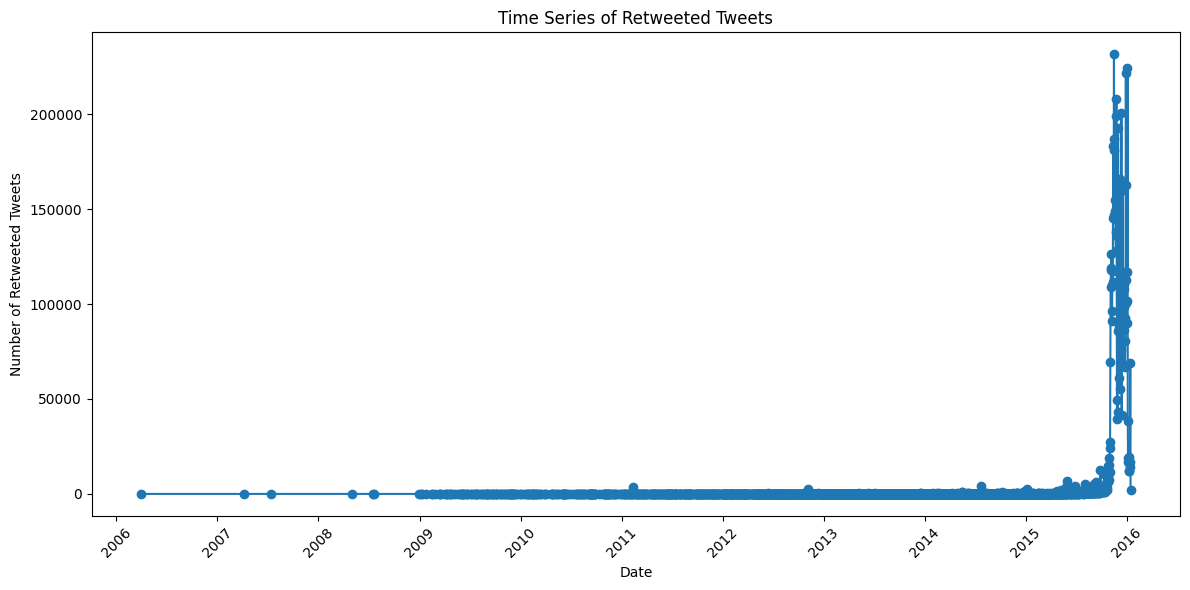

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'rt.created' to datetime (adjust format if needed)
data['rt.created'] = pd.to_datetime(data['rt.created'], errors='coerce')

# Remove rows with invalid dates
data = data.dropna(subset=['rt.created'])

# Extract the date (without time) from 'rt.created'
data['date'] = data['rt.created'].dt.date

# Group by date and count the number of tweets retweeted on each day
time_series = data.groupby('date').size().reset_index(name='tweet_count')

print(time_series.head())

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series['date'], time_series['tweet_count'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Retweeted Tweets')
plt.title('Time Series of Retweeted Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jr24440\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


         date  sentiment
0  2008-05-01     0.7845
1  2009-01-06     0.4019
2  2009-02-16    -0.3818
3  2009-05-27     0.2732
4  2009-06-22     0.0000


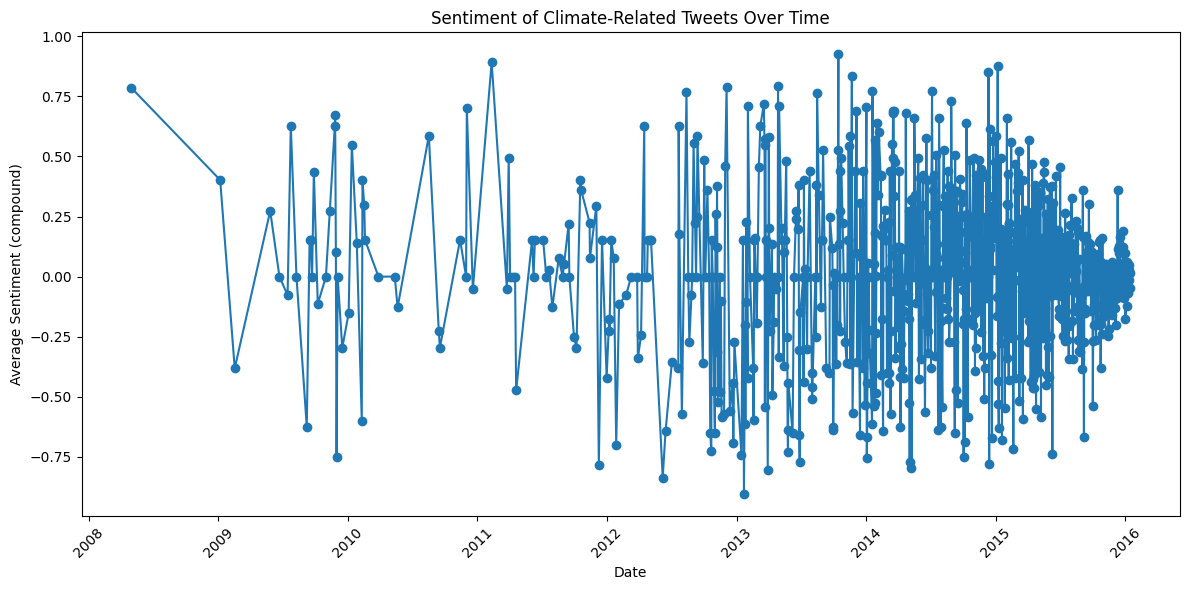

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Uncomment the following line if you haven't downloaded the VADER lexicon before
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Filter the dataset to only climate-related tweets
climate_tweets = data[data['climate_related']].copy()

# Ensure that 'rt.created' is converted to datetime and extract the date if not already done
climate_tweets['rt.created'] = pd.to_datetime(climate_tweets['rt.created'], errors='coerce')
climate_tweets = climate_tweets.dropna(subset=['rt.created'])
climate_tweets['date'] = climate_tweets['rt.created'].dt.date

# Compute the compound sentiment score for each tweet
climate_tweets['sentiment'] = climate_tweets['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Group by date and compute the average sentiment for each day
sentiment_over_time = climate_tweets.groupby('date')['sentiment'].mean().reset_index()

print(sentiment_over_time.head())

# Plot the time series of average sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time['date'], sentiment_over_time['sentiment'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (compound)')
plt.title('Sentiment of Climate-Related Tweets Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
print(data.head())

           twid         rtwid  rt.user.verified  rt.followers  rt.user.id_str  \
0  6.612629e+17  6.611444e+17              True         11696    1.557932e+09   
1  6.612629e+17  6.612537e+17              True            69    2.593436e+09   
2  6.612629e+17  6.594803e+17              True           419    2.787791e+09   
3  6.612629e+17  6.612477e+17              True          3189    4.970305e+08   
4  6.612629e+17  6.611698e+17              True           878    3.233484e+09   

                                                text  rt.count  \
0  When you about to ask her dad for her hand in ...      1024   
1  When your friend asks @aleem_official for a "h...         3   
2  It's #weddinghour, so top up your glass and en...         2   
3  Think of a card? When you book me I will tell ...        14   
4  @Gurmeetramrahim #7thWeekMSG2\nMarriage of Shu...        17   

               src                rt.created timestamp  user.verified  \
0    ProteinShaykh 2015-11-02 11:34:35+00:0

In [18]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
import numpy as np

###############################################################################
# 0. PREPARATION
#    - Make sure you have installed transformers & torch:
#         pip install transformers torch
#    - This code uses two public models:
#       1) Hate-speech-CNERG/bert-base-uncased-hatexplain
#       2) KaiLv/bert-base-misinformation
###############################################################################


C:\Users\jr24440\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:

###############################################################################
# 1. CLEAN THE TEXT DATA
###############################################################################
def preprocess_text(text):
    # 1) Lowercase
    text = text.lower()
    # 2) Remove URLs
    text = re.sub(r'http\S+', '', text)
    # 3) Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # 4) Remove '#' symbol (but keep the word)
    text = re.sub(r'#', '', text)
    # 5) Remove punctuation / non-alphanumeric (except spaces)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # 6) Strip extra whitespace
    text = text.strip()
    return text

# We assume you have a DataFrame named 'data' with columns:
#   - 'text': original tweet text
#   - 'climate_related': boolean indicating if tweet is about climate
#   - 'rt.created': retweet creation date/time
#   - 'rt.count': retweet count (optional, for volume metrics)
#   - possibly others

# Clean the text into 'text_clean'
data['text_clean'] = data['text'].apply(preprocess_text)


In [20]:

###############################################################################
# 2. FILTER FOR CLIMATE-RELATED TWEETS WITH VALID DATES
###############################################################################
# Convert 'rt.created' to datetime
data['rt.created'] = pd.to_datetime(data['rt.created'], errors='coerce')

# Create a mask for climate tweets with valid date
mask = data['climate_related'] & data['rt.created'].notna()

# Select columns needed for classification & analysis
needed_cols = ['rt.created', 'text_clean', 'rt.count']
climate_df = data.loc[mask, needed_cols].copy()

# Extract date if not already present
climate_df['date'] = climate_df['rt.created'].dt.date


In [21]:
###############################################################################
# 3. SET UP NLP PIPELINES
###############################################################################
# A) Hate Speech Classifier
#    - Model: Hate-speech-CNERG/bert-base-uncased-hatexplain
#    - Labels typically: ["normal", "offensive", "hatespeech"]
hate_pipeline = pipeline(
    "text-classification",
    model="Hate-speech-CNERG/bert-base-uncased-hatexplain",
    tokenizer="Hate-speech-CNERG/bert-base-uncased-hatexplain"
)

Device set to use cpu


In [22]:
# B) Misinformation Classifier
#    - Model: KaiLv/bert-base-misinformation
#    - The label mapping is not fully documented. You must confirm by printing out sample outputs.
misinfo_pipeline = pipeline(
    "text-classification",
    model="roupenminassian/TwHIN-BERT-Misinformation-Classifier",
    tokenizer="roupenminassian/TwHIN-BERT-Misinformation-Classifier"
)

Device set to use cpu


In [23]:

###############################################################################
# 4. CLASSIFICATION FUNCTIONS
###############################################################################
def classify_hate(text):
    """
    For Hate-speech-CNERG/bert-base-uncased-hatexplain:
      - 'normal' => 0
      - 'offensive' or 'hatespeech' => 1
    """
    if not text:
        return 0
    result = hate_pipeline(text[:512])[0]  # Truncate to 512 tokens
    label = result['label'].lower()
    return 1 if label in ["offensive", "hatespeech"] else 0

def classify_misinfo(text):
    """
    For KaiLv/bert-base-misinformation:
      - We must verify which label means "misinformation."
      - This example guesses 'LABEL_1' => misinformation, 'LABEL_0' => not misinformation.
      - Print some samples to confirm. E.g.:
         print(misinfo_pipeline("This is obviously fake news!"))
    """
    if not text:
        return 0
    result = misinfo_pipeline(text[:512])[0]
    # Check the returned label. Example: "LABEL_0" or "LABEL_1"
    label = result['label']
    # We guess LABEL_1 => misinformation
    return 1 if label == "LABEL_1" else 0



In [ ]:

###############################################################################
# 5. APPLY CLASSIFIERS TO CLIMATE TWEETS
###############################################################################
climate_df['hate'] = climate_df['text_clean'].apply(classify_hate)
climate_df['misinfo'] = climate_df['text_clean'].apply(classify_misinfo)


###############################################################################
# 6. AGGREGATE DAILY STATS
###############################################################################
daily_stats = (
    climate_df
    .groupby('date')
    .agg(
        tweet_count=('text_clean', 'count'),
        hate_count=('hate', 'sum'),
        misinfo_count=('misinfo', 'sum'),
        total_retweets=('rt.count', 'sum')  # optional
    )
    .reset_index()
)

# Proportions
daily_stats['hate_prop'] = daily_stats['hate_count'] / daily_stats['tweet_count']
daily_stats['misinfo_prop'] = daily_stats['misinfo_count'] / daily_stats['tweet_count']

# Create a "discourse_volume" metric (tweets + retweets) if desired
daily_stats['discourse_volume'] = daily_stats['tweet_count'] + daily_stats['total_retweets']

###############################################################################
# 7. VISUALIZE
###############################################################################
plt.figure(figsize=(10, 5))
plt.plot(daily_stats['date'], daily_stats['discourse_volume'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Climate Discourse Volume')
plt.title('Climate Discourse Volume Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(daily_stats['date'], daily_stats['hate_prop'], label='Hate Prop', color='red')
plt.plot(daily_stats['date'], daily_stats['misinfo_prop'], label='Misinfo Prop', color='blue')
plt.xlabel('Date')
plt.ylabel('Proportion of Climate Tweets')
plt.title('Negative Discourse (Hate / Misinformation) Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###############################################################################
# 8. INTERPRETATION & NEXT STEPS
###############################################################################
# - You now have daily metrics of how many climate-related tweets are flagged
#   as hate or misinformation.
# - Confirm the label mapping for the misinformation model by testing a few
#   known "fake" and "real" examples.
# - If you need a conspiracy classifier, you'll need to find a different
#   public model or train your own.
# - For production or high-quality results, consider fine-tuning on
#   domain-specific data.


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.
